# Multi-class Image Classification

1. Become one with the data
2. Preprecess the data (get it ready for a model)
3. create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparamerters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

# 1. Import and become one with the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-02-14 13:52:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.1MB/s    in 23s     

2023-02-14 13:52:30 (21.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# walk through 10 classes of food image data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 1

In [3]:
# class names 

class_names = sorted(os.listdir("10_food_classes_all_data/train"))
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [4]:
# train and test directories

path = "10_food_classes_all_data"
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [5]:
import random
import matplotlib.pyplot as plt

# plotting rand images
def plot_rand_img(path, typeofdata, class_names):
  path = f"{path}/{typeofdata}"
  rand_food = random.choice(class_names)
  path = f"{path}/{rand_food}"
  images = os.listdir(path)
  rand_img = random.choice(images)
  path = f"{path}/{rand_img}"
  
  # plotting the img and label
  img = plt.imread(path)
  plt.imshow(img)
  plt.title(rand_food)
  plt.axis(False)

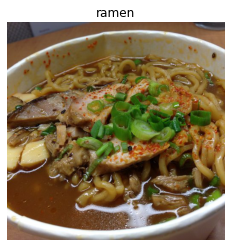

In [6]:
plot_rand_img(path = path, typeofdata = "train", class_names = class_names)

# 2. Preprocess the data (prepare it for a model)

In [7]:
import tensorflow as tf

# Rescale
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)

# load data in from directories and turn it into batches 
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# 3. Create a model

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# create a model
model_1 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3)),
    Activation(activation = "relu"),
    Conv2D(10, 3, activation  = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

# compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

* the more data you use, the more timme it takes to learn patterns

# 4. Fit the model

In [9]:
# fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 58s 205ms/step - loss: 2.1262 - accuracy: 0.2212 - val_loss: 1.9476 - val_accuracy: 0.3160
Epoch 2/5
235/235 [==============================] - 46s 195ms/step - loss: 1.8718 - accuracy: 0.3455 - val_loss: 1.8924 - val_accuracy: 0.3268
Epoch 3/5
235/235 [==============================] - 56s 238ms/step - loss: 1.6154 - accuracy: 0.4524 - val_loss: 1.8408 - val_accuracy: 0.3528
Epoch 4/5
235/235 [==============================] - 46s 197ms/step - loss: 1.1041 - accuracy: 0.6367 - val_loss: 2.0415 - val_accuracy: 0.3412
Epoch 5/5
235/235 [==============================] - 46s 196ms/step - loss: 0.4967 - accuracy: 0.8411 - val_loss: 3.0436 - val_accuracy: 0.2928


# 5. Evaluate the model

In [10]:
# Evaluate the model
model_1.evaluate(test_data)

79/79 [==============================] - 11s 141ms/step - loss: 3.0436 - accuracy: 0.2928


[3.0435633659362793, 0.29280000925064087]

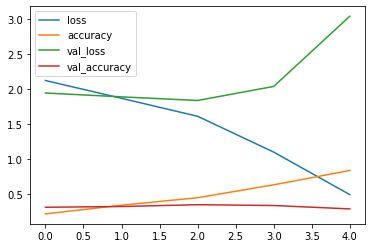

In [11]:
# plot the accuracy and loss curves
import pandas as pd
pd.DataFrame(history_1.history).plot();

> It seems the model is overfitting and it fails to generalize in the unseen data

 # 6. Adjust the model hyperparameters(to beat the baseline/ reduce overfitting)

 Due to its performance on the training data, it's clear our model is learning something...

 1. Get more Data
 2.  Simplify the model
 3. Use data augmentation
 4. Use transfer learning

In [12]:
# simple model
model_2 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [13]:
# fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 190ms/step - loss: 2.2675 - accuracy: 0.2100 - val_loss: 2.0336 - val_accuracy: 0.2556
Epoch 2/5
235/235 [==============================] - 43s 184ms/step - loss: 1.9311 - accuracy: 0.3349 - val_loss: 1.9765 - val_accuracy: 0.3160
Epoch 3/5
235/235 [==============================] - 44s 188ms/step - loss: 1.6269 - accuracy: 0.4524 - val_loss: 2.0135 - val_accuracy: 0.3156
Epoch 4/5
235/235 [==============================] - 54s 232ms/step - loss: 1.2012 - accuracy: 0.6136 - val_loss: 2.3133 - val_accuracy: 0.2792
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.7516 - accuracy: 0.7681 - val_loss: 2.6543 - val_accuracy: 0.2848


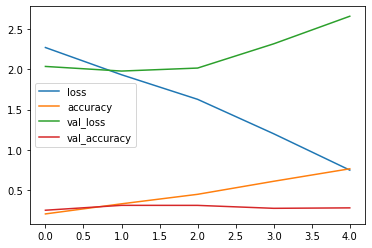

In [14]:
# plot loss and accuracy curve for model 2
pd.DataFrame(history_2.history).plot()

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

#  Trying to reduce overfitting with data augmentation


In [20]:
# create an augmented data generator instance
train_datagen_augmented = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "categorical")

Found 7500 images belonging to 10 classes.


> clone_model - just clones the model(just copies the internal architecture) and creates no internal parameters(does not copy the weights and biases of the previous model)

augmented data

In [28]:
# Let's clone the model 3
model_3 = tf.keras.models.clone_model(model_1)

# compile the cloned model
model_3.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 120s 502ms/step - loss: 2.1956 - accuracy: 0.1891 - val_loss: 1.9805 - val_accuracy: 0.2884
Epoch 2/5
235/235 [==============================] - 114s 484ms/step - loss: 2.0610 - accuracy: 0.2651 - val_loss: 1.8839 - val_accuracy: 0.3600
Epoch 3/5
235/235 [==============================] - 114s 487ms/step - loss: 1.9868 - accuracy: 0.3032 - val_loss: 1.8279 - val_accuracy: 0.3624
Epoch 4/5
235/235 [==============================] - 112s 477ms/step - loss: 1.9288 - accuracy: 0.3343 - val_loss: 1.8715 - val_accuracy: 0.3732
Epoch 5/5
235/235 [==============================] - 112s 478ms/step - loss: 1.9167 - accuracy: 0.3424 - val_loss: 1.7918 - val_accuracy: 0.4056


In [29]:
# evaluate the model
model_3.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 1.7918 - accuracy: 0.4056


[1.791794776916504, 0.40560001134872437]

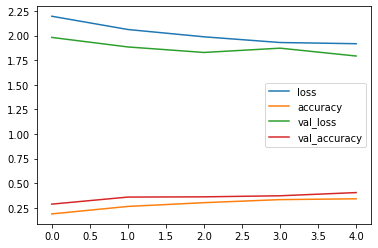

In [30]:
# plot loss and accuracy curve for model 3 that fitted with augmented data
pd.DataFrame(history_3.history).plot();

# 7. Repeat until satisfied

1. restructing our model's architecture
2. adust the learning rate
3. try different methods of data augmentation
4. training for longer
5. try transfer learning

# save and load 

In [31]:
# save a model
model_3.save("multiclass_classification_model")

In [32]:
loaded_model_3 = tf.keras.models.load_model("multiclass_classification_model")
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 15s 188ms/step - loss: 1.7918 - accuracy: 0.4056


[1.7917948961257935, 0.40560001134872437]

In [33]:
model_3.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 1.7918 - accuracy: 0.4056


[1.7917948961257935, 0.40560001134872437]